In [8]:
# --- Бібліотеки для даної роботи ---
try:
    import numpy, pandas, matplotlib, plotly, nbformat, seaborn, sklearn, jinja2
    print("Бібліотеки вже встановлені. Пропускаємо інсталяцію.")
except ImportError:
    print("Встановлюємо бібліотеки...")
    %pip install numpy pandas matplotlib plotly nbformat seaborn scikit-learn jinja2

Бібліотеки вже встановлені. Пропускаємо інсталяцію.


## Домашнє завдання: Тема 4. Вимірювання відстаней та подібностей в аналізі даних

### **Це допоможе закріпити такі навички:**

- Норми, метрики, використання для опису даних
- Застосування функцій Pandas, Numpy

### **Завдання (крок за кроком):**

1. **Завантажте та ознайомтесь з даними:**
   - Завантажте набір даних **Breast Cancer** за допомогою функції `load_breast_cancer()` з бібліотеки `sklearn`.
   - Перегляньте опис набору даних, щоб зрозуміти структуру та характеристики.

2. **Створіть DataFrame:**
   - Створіть `DataFrame`, використовуючи дані з набору **Breast Cancer**.

3. **Виведіть інформацію про дані:**
   - Використовуйте функцію `info()` для виведення інформації про типи стовпців та кількість непустих значень в кожному стовпці.

4. **Виведіть описові статистики:**
   - Використовуйте функцію `describe()` для виведення описових статистик даних.

5. **Стандартизуйте дані:**
   - Застосуйте процес стандартизації даних за допомогою функцій з конспекту або бібліотеки `sklearn`.

6. **Побудуйте точкові діаграми:**
   - Використайте функцію `pairplot()` з бібліотеки seaborn для побудови точкових діаграм між усіма стовпцями.

7. **Обчисліть матриці відстаней:**
   - Використовуйте алгоритми та функції з конспекту для обчислення матриці відстаней для різних метрик: `cityblock`, `cosine`, `euclidean`, `l1`, `manhattan`.

8. **Візуалізуйте отримані матриці:**
   - Використайте функцію `heatmap` з бібліотеки `seaborn` або інші методи візуалізації для представлення отриманих матриць відстаней.

9. **Висновок:**
   - Зробіть висновок на основі аналізу отриманих результатів та порівняйте ефективність різних метрик відстаней для даного набору даних.
   - Використовуйте середовище Jupyter Notebook або іншу платформу для написання текстових висновків та аналізу результатів.

**0. Імпорт необхідних бібліотек:**

In [9]:
import warnings
warnings.filterwarnings('ignore')

import io
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris, load_wine, load_digits, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display

**1-3. Завантаження, створення DataFrame та виведення інформації про дані:**

In [10]:
print("Доступні набори даних для аналізу:")
print("1 = Breast Cancer (Рак молочної залози)")
print("2 = Iris (Квітки ірису)")
print("3 = Wine (Сорти вина)")
print("4 = Digits (Рукописні цифри 8x8)")
print("5 = Синтетичні дані (make_classification)")
print("-" * 55)

user_input = input("👉 Введіть цифру від 1 до 5 та натисніть Enter: ")

try:
    dataset_choice = int(user_input.strip())
except ValueError:
    print("\n❌ Помилка: Введено некоректне значення. Завантажую 'Breast Cancer' за замовчуванням.")
    dataset_choice = 1

dataset_name = ""

if dataset_choice == 1:
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    dataset_name = "Breast Cancer"

elif dataset_choice == 2:
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    dataset_name = "Iris"

elif dataset_choice == 3:
    data = load_wine()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    dataset_name = "Wine"

elif dataset_choice == 4:
    data = load_digits()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    dataset_name = "Digits"

elif dataset_choice == 5:
    X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
    feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    dataset_name = "Синтетичні дані (make_classification)"

else:
    print("❌ Помилка: Введено невірну цифру. Завантажую Breast Cancer за замовчуванням.")
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    dataset_name = "Breast Cancer"

df_preview = df.head(15).round(5)
table_values = [list(range(1, len(df_preview) + 1))] + [df_preview[col] for col in df_preview.columns]

col_widths = [50] + [150] * len(df_preview.columns)
calculated_width = sum(col_widths)

fig_table = go.Figure(data=[go.Table(
    columnwidth=col_widths,
    header=dict(
        values=["<b>№</b>"] + [f"<b>{col}</b>" for col in df_preview.columns],
        fill_color='#2c2c2c',
        font=dict(color='white', size=13),
        align='center',
        height=40
    ),
    cells=dict(
        values=table_values,
        fill_color='#111111',
        font=dict(color='lightgrey', size=13),
        align=['center'] + ['center'] * len(df_preview.columns),
        height=35
    )
)])

fig_table.update_layout(
    title=f'Набір даних: {dataset_name} (Перші 15 рядків та усі {len(df_preview.columns)} колонок)',
    template='plotly_dark',
    margin=dict(l=0, r=0, t=50, b=0),
    height=250,
    width=calculated_width
)

print("Красивий Вивід:")
fig_table.show()

print("\nТехнічний вивід:")
buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()
print(s)
print(f"Загальна розмірність: {df.shape[0]} рядків, {df.shape[1]} стовпців.")

Доступні набори даних для аналізу:
1 = Breast Cancer (Рак молочної залози)
2 = Iris (Квітки ірису)
3 = Wine (Сорти вина)
4 = Digits (Рукописні цифри 8x8)
5 = Синтетичні дані (make_classification)
-------------------------------------------------------
Красивий Вивід:



Технічний вивід:
<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error   

**4. Виведення описової статистики:**

In [11]:
print("Красивий Вивід:")
display(df.describe().T.style.background_gradient(cmap='viridis').format("{:.5f}"))

print("\nТехнічний вивід:")
print(df.describe().iloc[:, :5])

Красивий Вивід:


,count,mean,std,min,25%,50%,75%,max
mean radius,569.00000,14.12729,3.52405,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.00000,19.28965,4.30104,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.00000,91.96903,24.29898,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.00000,654.88910,351.91413,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.00000,0.09636,0.01406,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.00000,0.10434,0.05281,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.00000,0.08880,0.07972,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.00000,0.04892,0.03880,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.00000,0.18116,0.02741,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.00000,0.06280,0.00706,0.04996,0.05770,0.06154,0.06612,0.09744



Технічний вивід:
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.127292     19.289649       91.969033   654.889104         0.096360
std       3.524049      4.301036       24.298981   351.914129         0.014064
min       6.981000      9.710000       43.790000   143.500000         0.052630
25%      11.700000     16.170000       75.170000   420.300000         0.086370
50%      13.370000     18.840000       86.240000   551.100000         0.095870
75%      15.780000     21.800000      104.100000   782.700000         0.105300
max      28.110000     39.280000      188.500000  2501.000000         0.163400


**5. Стандартизація даних:**

In [12]:
scaler = StandardScaler()
features = [col for col in df.columns if col != 'target']

df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
df_scaled['target'] = df['target']

df_scaled_preview = df_scaled.head(15).round(5)
table_values_scaled = [list(range(1, len(df_scaled_preview) + 1))] + [df_scaled_preview[col] for col in df_scaled_preview.columns]

col_widths_scaled = [50] + [150] * len(df_scaled_preview.columns)
calculated_width_scaled = sum(col_widths_scaled)

fig_table_scaled = go.Figure(data=[go.Table(
    columnwidth=col_widths_scaled,
    header=dict(
        values=["<b>№</b>"] + [f"<b>{col}</b>" for col in df_scaled_preview.columns],
        fill_color='#2c2c2c',
        font=dict(color='white', size=13),
        align='center',
        height=40
    ),
    cells=dict(
        values=table_values_scaled,
        fill_color='#111111',
        font=dict(color='lightgrey', size=13),
        align=['center'] + ['center'] * len(df_scaled_preview.columns),
        height=35
    )
)])

fig_table_scaled.update_layout(
    title=f'Стандартизовані дані: {dataset_name} (Перші 15 рядків та усі {len(df_scaled_preview.columns)} колонок)',
    template='plotly_dark',
    margin=dict(l=0, r=0, t=50, b=0),
    height=400, 
    width=calculated_width_scaled
)

print("Красивий Вивід:")
fig_table_scaled.show()

print("\nТехнічний вивід:")
print("Середнє значення ознак після стандартизації (має бути ~0):")
print(np.round(df_scaled[features].mean(), 5).head(10).round(5))
print("\nСтандартне відхилення ознак після стандартизації (має бути ~1):")
print(df_scaled[features].std().head(10).round(5))

Красивий Вивід:



Технічний вивід:
Середнє значення ознак після стандартизації (має бути ~0):
mean radius              -0.0
mean texture              0.0
mean perimeter           -0.0
mean area                -0.0
mean smoothness          -0.0
mean compactness          0.0
mean concavity            0.0
mean concave points      -0.0
mean symmetry             0.0
mean fractal dimension    0.0
dtype: float64

Стандартне відхилення ознак після стандартизації (має бути ~1):
mean radius               1.00088
mean texture              1.00088
mean perimeter            1.00088
mean area                 1.00088
mean smoothness           1.00088
mean compactness          1.00088
mean concavity            1.00088
mean concave points       1.00088
mean symmetry             1.00088
mean fractal dimension    1.00088
dtype: float64


**6. Побудова точкової діаграми:**


⚠️ Увага: Набір містить 30 ознак.
Для уникнення перевантаження пам'яті та збереження читабельності графіка - візуалізується лише перші 10.

Красивий Вивід:


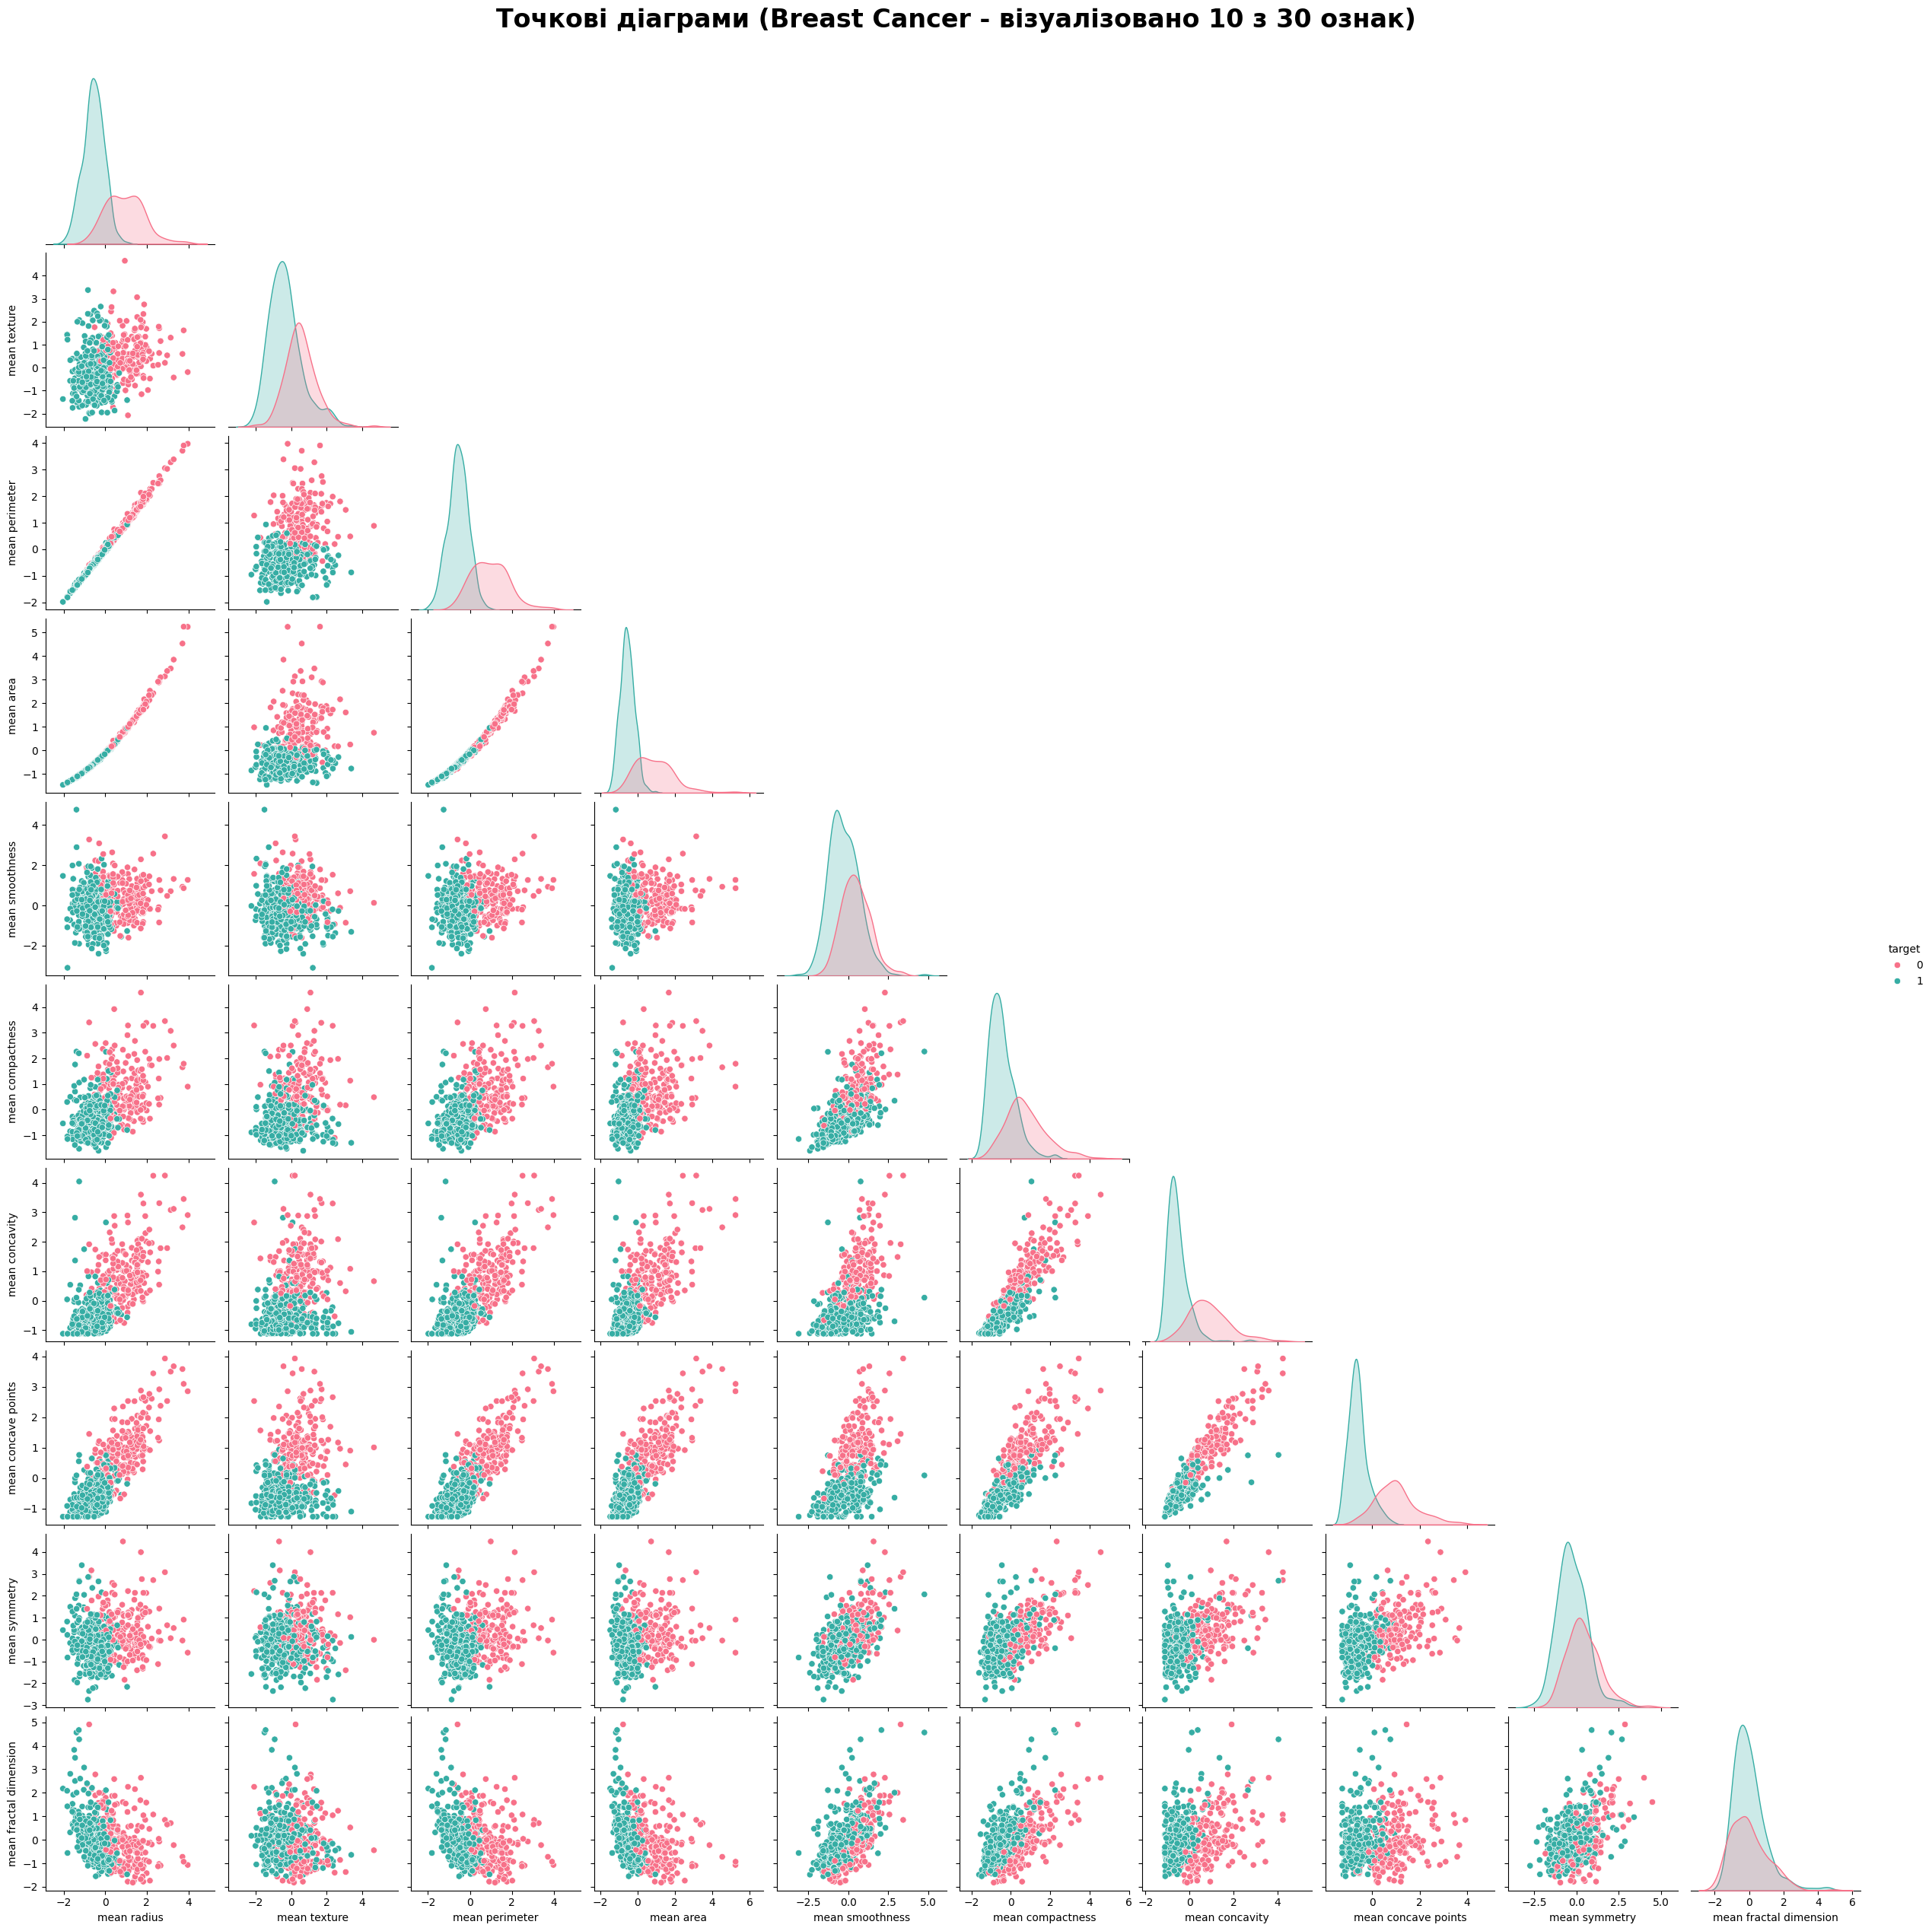

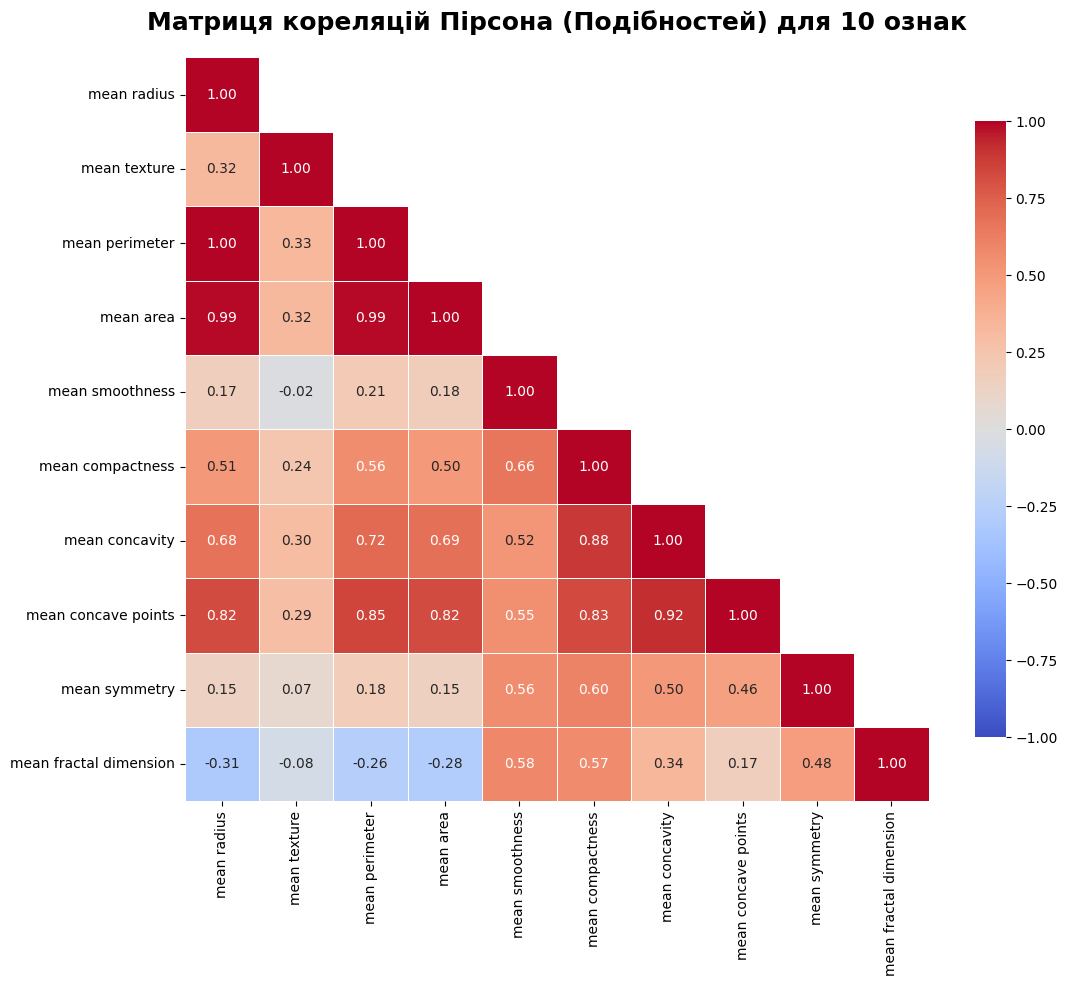

Значення в матриці кореляцій варіюються від -1 (сильна зворотна залежність) до 1 (сильна пряма залежність). 0 означає відсутність лінійного зв'язку.

Технічний вивід:
Побудовано pairplot та матрицю кореляцій для 10 ознак:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']


In [13]:
max_plot_features = 10
total_features = len(features)
plot_limit = min(max_plot_features, total_features)
selected_features = features[:plot_limit]

if total_features > max_plot_features:
    print(f"\n⚠️ Увага: Набір містить {total_features} ознак.")
    print(f"Для уникнення перевантаження пам'яті та збереження читабельності графіка - візуалізується лише перші {plot_limit}.")
else:
    print(f"\n✅ Візуалізовано всі {total_features} ознак набору даних.")

print("\nКрасивий Вивід:")

sns.pairplot(df_scaled, vars=selected_features, hue='target', palette='husl', corner=True)
plt.suptitle(f"Точкові діаграми ({dataset_name} - візуалізовано {plot_limit} з {total_features} ознак)", y=1.02, fontsize=24, fontweight='bold')
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df_scaled[selected_features].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title(f"Матриця кореляцій Пірсона (Подібностей) для {plot_limit} ознак", fontsize=18, fontweight='bold', pad=20)
plt.show()
print("Значення в матриці кореляцій варіюються від -1 (сильна зворотна залежність) до 1 (сильна пряма залежність). 0 означає відсутність лінійного зв'язку.")

print("\nТехнічний вивід:")
print(f"Побудовано pairplot та матрицю кореляцій для {plot_limit} ознак:")
print(list(selected_features))

**7-8. Обчислити матриці відстаней та візуалізувати її:**

Красивий Вивід:


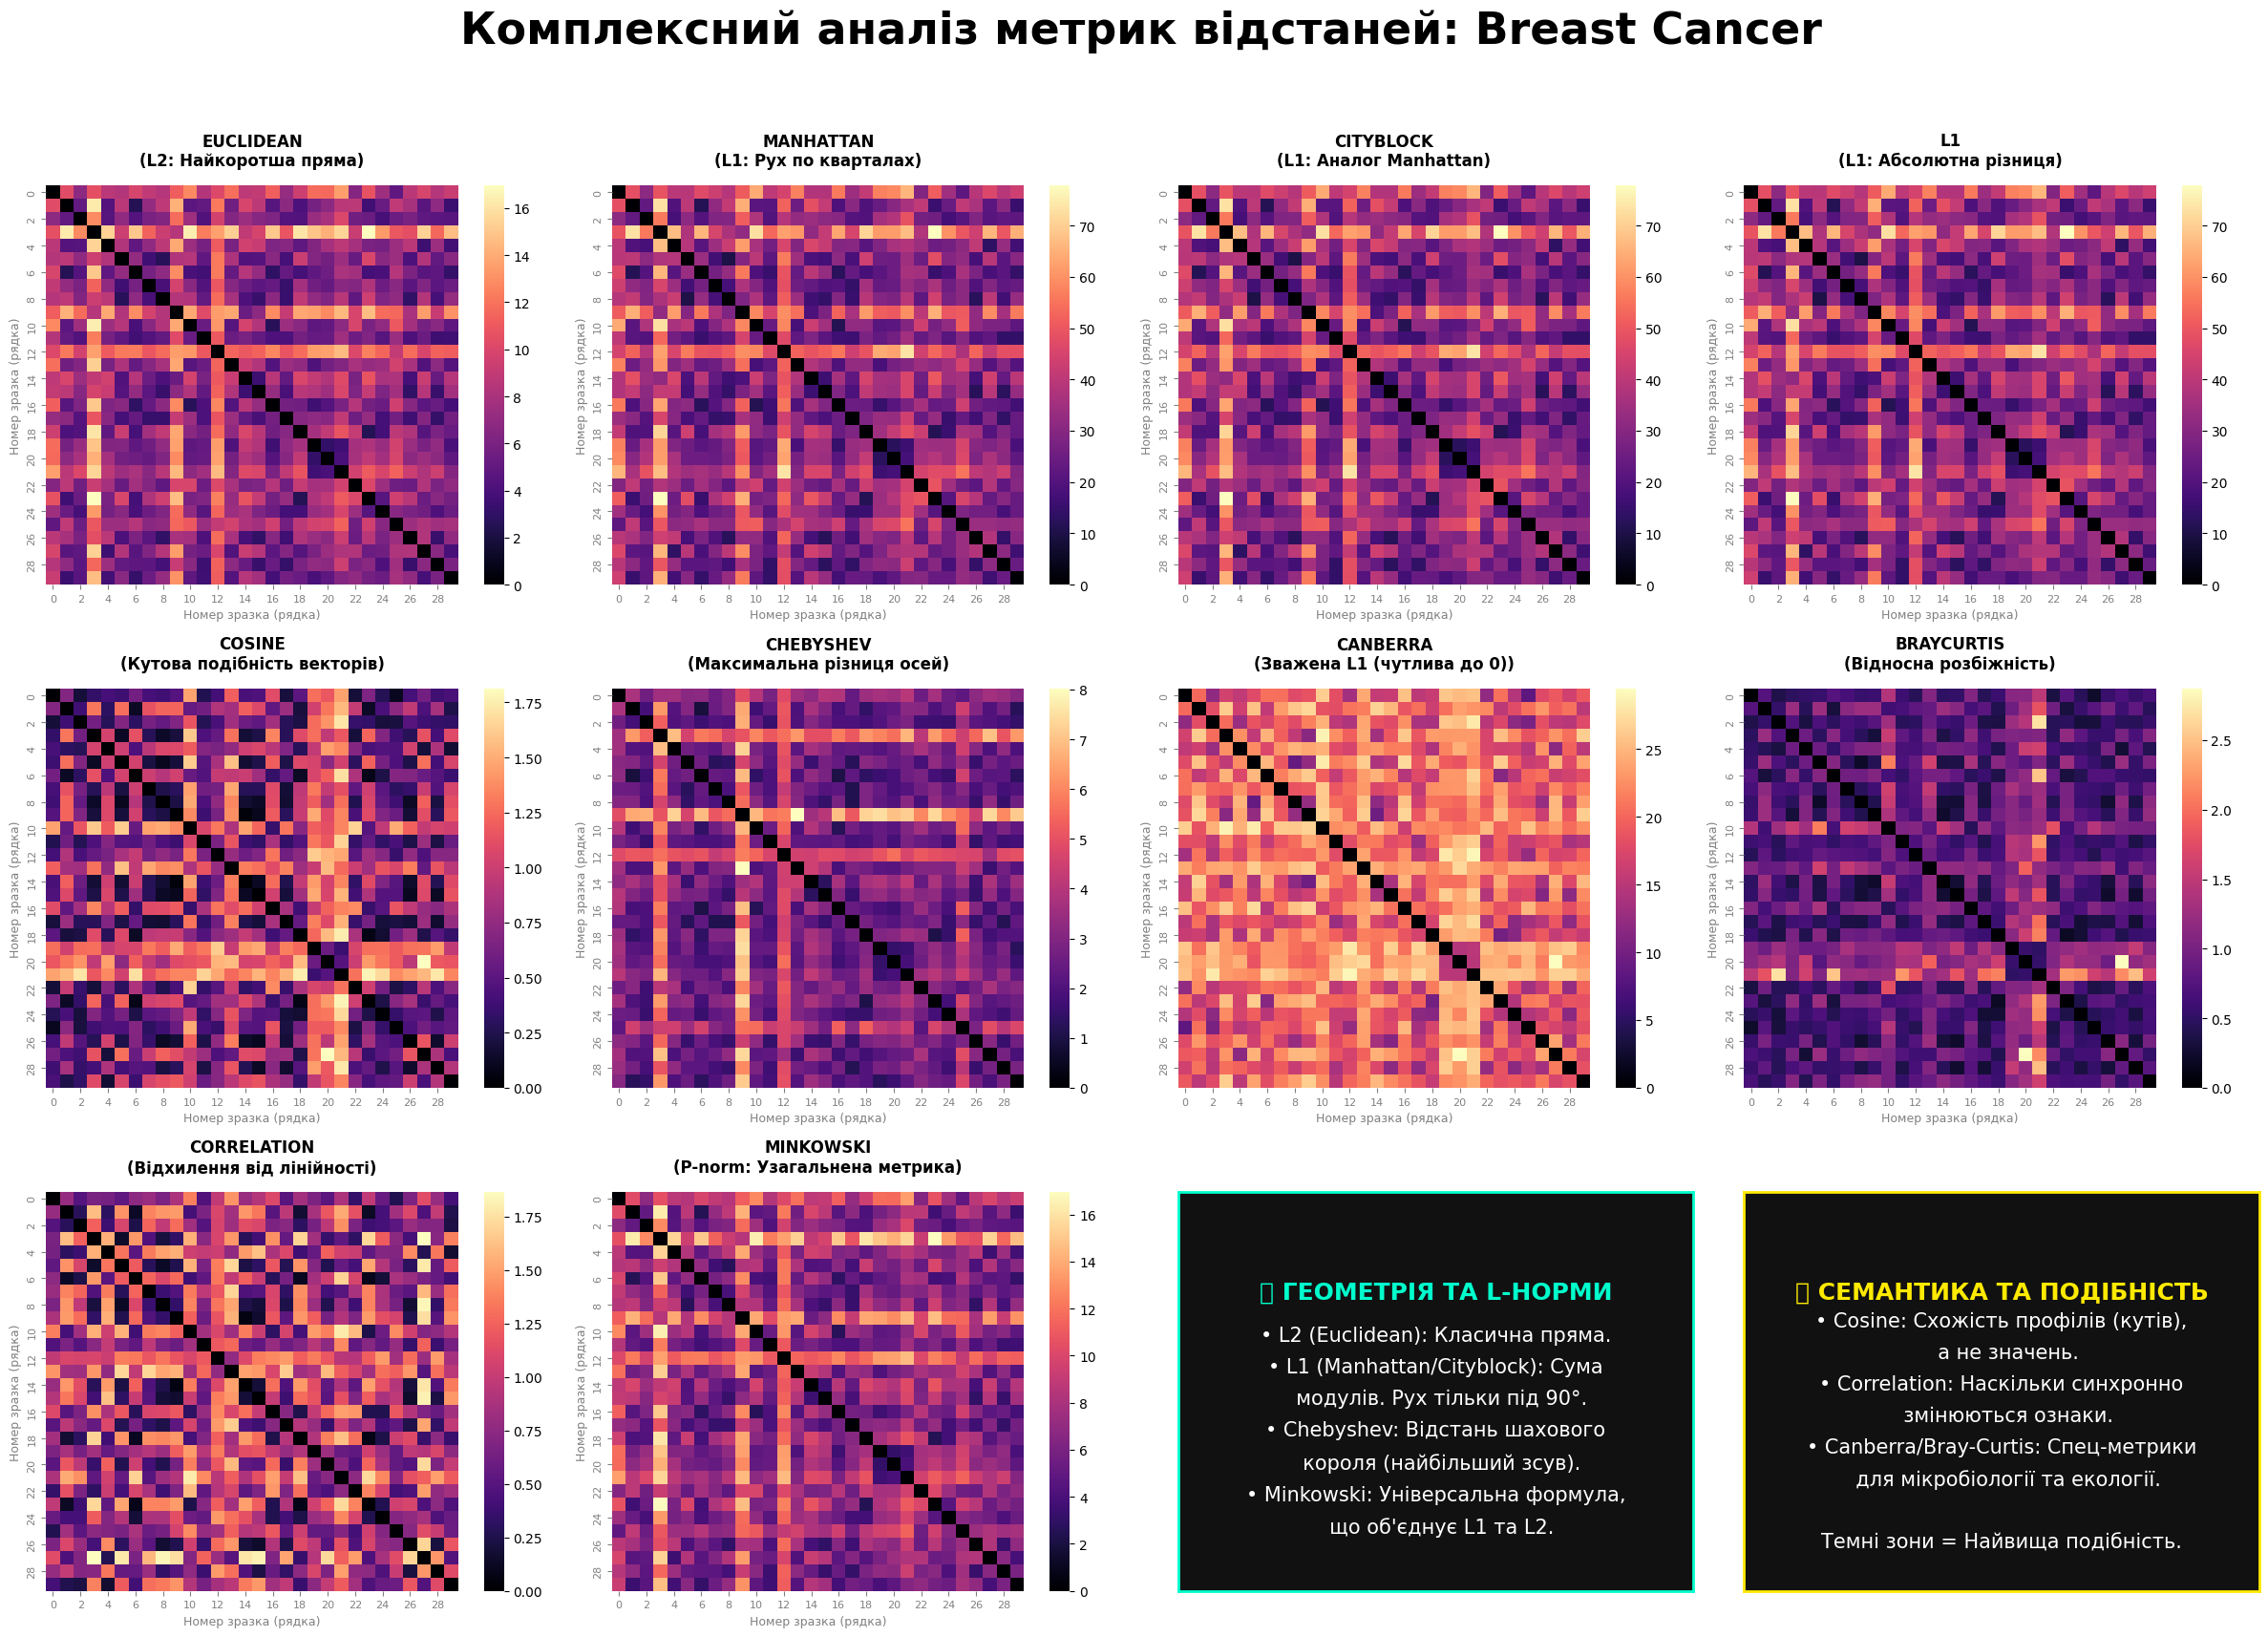


Технічний вивід:
Розраховано метрик: 10. Використано вибірку з 30 об'єктів.
-> euclidean    | Діапазон значень: [0.00000 ... 16.95972]
-> manhattan    | Діапазон значень: [0.00000 ... 77.81071]
-> cityblock    | Діапазон значень: [0.00000 ... 77.81071]
-> l1           | Діапазон значень: [0.00000 ... 77.81071]
-> cosine       | Діапазон значень: [0.00000 ... 1.81192]
-> chebyshev    | Діапазон значень: [0.00000 ... 8.01479]
-> canberra     | Діапазон значень: [0.00000 ... 29.46163]
-> braycurtis   | Діапазон значень: [0.00000 ... 2.86989]
-> correlation  | Діапазон значень: [0.00000 ... 1.86553]
-> minkowski    | Діапазон значень: [0.00000 ... 16.95972]


In [14]:
metric_descriptions = {
    'euclidean': 'L2: Найкоротша пряма',
    'manhattan': 'L1: Рух по кварталах',
    'cityblock': 'L1: Аналог Manhattan',
    'l1': 'L1: Абсолютна різниця',
    'cosine': 'Кутова подібність векторів',
    'chebyshev': 'Максимальна різниця осей',
    'canberra': 'Зважена L1 (чутлива до 0)',
    'braycurtis': 'Відносна розбіжність',
    'correlation': 'Відхилення від лінійності',
    'minkowski': 'P-norm: Узагальнена метрика'
}

sample_size = min(30, df_scaled.shape[0])
features_list = [col for col in df_scaled.columns if col != 'target']
sample_data = df_scaled[features_list].head(sample_size)

all_metrics = list(metric_descriptions.keys())
dist_matrices = {}

for m in all_metrics:
    try:
        dist_matrices[m] = pairwise_distances(sample_data, metric=m)
    except Exception:
        continue

active_metrics = list(dist_matrices.keys())
n_metrics = len(active_metrics)

print("Красивий Вивід:")

fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.flatten()

for i in range(min(n_metrics, 10)):
    m_name = active_metrics[i]
    desc = metric_descriptions.get(m_name, "")
    
    sns.heatmap(dist_matrices[m_name], ax=axes[i], cmap='magma', annot=False, cbar=True)
    
    axes[i].set_title(f"{m_name.upper()}\n({desc})", 
                      fontsize=12, fontweight='bold', pad=15)
    
    axes[i].set_xlabel("Номер зразка (рядка)", fontsize=9, color='gray')
    axes[i].set_ylabel("Номер зразка (рядка)", fontsize=9, color='gray')
    axes[i].tick_params(colors='gray', labelsize=8)

info_boxes = [
    (10, "📊 ГЕОМЕТРІЯ ТА L-НОРМИ", "#00ffcc", 
         "• L2 (Euclidean): Класична пряма.\n"
         "• L1 (Manhattan/Cityblock): Сума\n"
         "  модулів. Рух тільки під 90°.\n"
         "• Chebyshev: Відстань шахового\n"
         "  короля (найбільший зсув).\n"
         "• Minkowski: Універсальна формула,\n"
         "  що об'єднує L1 та L2."),
    
    (11, "📐 СЕМАНТИКА ТА ПОДІБНІСТЬ", "#ffea00", 
         "• Cosine: Схожість профілів (кутів),\n"
         "  а не значень.\n"
         "• Correlation: Наскільки синхронно\n"
         "  змінюються ознаки.\n"
         "• Canberra/Bray-Curtis: Спец-метрики\n"
         "  для мікробіології та екології.\n\n"
         "Темні зони = Найвища подібність.")
]

for idx, title, color, text in info_boxes:
    axes[idx].set_facecolor('#111111')
    axes[idx].text(0.5, 0.75, title, ha='center', va='center', 
                   fontsize=18, color=color, fontweight='bold')
    axes[idx].text(0.5, 0.4, text, ha='center', va='center', 
                   fontsize=15, color='white', linespacing=1.8)
    axes[idx].set_xticks([]); axes[idx].set_yticks([])
    for spine in axes[idx].spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(2)

for j in range(n_metrics, 10):
    fig.delaxes(axes[j])

plt.suptitle(f"Комплексний аналіз метрик відстаней: {dataset_name}", fontsize=33, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nТехнічний вивід:")
print(f"Розраховано метрик: {n_metrics}. Використано вибірку з {sample_size} об'єктів.")
for m in active_metrics:
    m_range = f"[{dist_matrices[m].min():.5f} ... {dist_matrices[m].max():.5f}]"
    print(f"-> {m.ljust(12)} | Діапазон значень: {m_range}")

**9. Висновок:**

### Аналітичні обчислення та висновки

#### 1. Обчислення метрик відстані аналітично (Проміжні кроки)

Для розуміння того, як алгоритми порівнюють об'єкти (наприклад, пацієнтів або квітки), розглянемо два вектори $A$ та $B$ з ознаками $(x_1, x_2, \dots, x_n)$:

**1.1 Евклідова відстань (L2 норма):**

Це "пряма лінія" між двома точками в $n$-вимірному просторі.

$$d_{euclidean}(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}$$

*Кроки:* Знаходимо різницю кожної ознаки $\rightarrow$ підносимо до квадрата $\rightarrow$ сумуємо $\rightarrow$ беремо квадратний корінь.

**1.2 Манхеттенська відстань (L1 норма / Cityblock):**

Вимірює відстань як суму абсолютних різниць (ніби рух по кварталах міста).

$$d_{manhattan}(A, B) = \sum_{i=1}^{n} |A_i - B_i|$$

*Кроки:* Знаходимо різницю кожної ознаки $\rightarrow$ беремо модуль $\rightarrow$ сумуємо. У бібліотеках `scipy/sklearn` метрики `l1`, `manhattan` та `cityblock` дають ідентичний результат.

**1.3 Косинусна відстань (Cosine):**

Визначає кут між векторами, ігноруючи їхню довжину (масштаб).

$$d_{cosine}(A, B) = 1 - \cos(\theta) = 1 - \frac{A \cdot B}{||A|| \times ||B||}$$

*Кроки:* Знаходимо скалярний добуток векторів $\rightarrow$ ділимо на добуток їхніх довжин (L2 норм) $\rightarrow$ віднімаємо від 1.

---

#### 2. Висновки щодо аналізу даних та порівняння метрик

1. **Важливість стандартизації:** Більшість реальних наборів даних (як Breast Cancer чи Wine) мають ознаки з кардинально різним масштабом. У багатовимірних просторах відстані мають властивість "розмиватися" (прокляття розмірності). Без застосування `StandardScaler`, ознаки з найбільшими числовими значеннями повністю домінували б при розрахунку відстаней, роблячи геометричні метрики нерелевантними.
2. **Мультиколінеарність (pairplot та кореляція):** Точкові діаграми та побудована Матриця кореляцій Пірсона чітко підтвердили наявність сильних лінійних зв'язків між певними групами ознак. Це свідчить про надмірність інформації, яку в майбутньому можна оптимізувати методами зменшення розмірності (наприклад, PCA).
3. **Евклідова відстань (L2):** Відмінно працює як базова метрика після стандартизації, оскільки вона чутлива до всіх змін ознак і добре розділяє кластери у безперервних числових даних.
4. **Манхеттенська відстань (L1):** Як видно з матриць, ця метрика дає більш стійкий (robust) результат до можливих екстремальних викидів або аномалій у вимірюваннях порівняно з L2.
5. **Косинусна відстань:** Візуалізація косинусної матриці кардинально відрізняється від L1/L2. Оскільки вона вимірює лише "напрямок" вектора (співвідношення ознак), вона об'єднує об'єкти з ідентичними пропорціями, незалежно від їхнього абсолютного розміру. Це вкрай корисно для виявлення специфічних *патернів*, а не просто фізичних обсягів.
6. **Додаткові метрики (Chebyshev, Minkowski тощо):** Розширений аналіз показав, що метрика Чебишова фіксує лише найбільшу різницю за однією конкретною ознакою між двома об'єктами (індикатор "найбільшого відхилення"), тоді як специфічні метрики на кшталт Canberra є дуже чутливими до значень, близьких до нуля.